# **AutoML-PACKAGE**

## **Overview**

**AutoML-PACKAGE** is a Python package designed to automate and simplify the machine learning workflow. It includes modules for preprocessing data, optimizing models, and evaluating results. The goal is to reduce the manual effort required for model selection and training while providing flexibility for advanced customization.

### Basic Specification

#### Target User Group
The primary target users for this tool are:
- Data analysts and scientists seeking automated solutions for model selection and optimization.
- Business professionals with limited knowledge of machine learning who want to apply predictive analytics to their datasets.
- Educators and students looking for an easy-to-use tool to learn about machine learning techniques and preprocessing.

#### Tool Specialization
This tool specializes in classification tasks - providing a streamlined pipeline for solving binary classification problems with minimal user input.

### **Key Features**
- **Preprocessing**: Handle missing values, normalize data, and extract relevant features.
- **Model Optimization**: Use advanced techniques like Bayesian optimization for hyperparameter tuning.
- **Evaluation Metrics**: Automatically evaluate models using custom metrics.
- **End-to-End Workflow**: Streamlined pipeline from data preprocessing to model evaluation.

### Review of Existing Solutions

Several existing tools offer similar functionalities to the proposed solution, such as:

1. **Auto-sklearn**:
   - A Python library that automates the process of selecting machine learning models and optimizing hyperparameters.
   - It uses Bayesian optimization and meta-learning to find the best pipeline for a given dataset.
   - Limitation: It requires more configuration for preprocessing and does not integrate seamlessly with custom workflows.

2. **H2O AutoML**:
   - A platform for building and deploying machine learning models automatically.
   - Provides strong support for classification and regression tasks with built-in feature engineering.
   - Limitation: Focused more on scalability for large datasets, with less flexibility for small-scale custom analyses.

3. **TPOT (Tree-based Pipeline Optimization Tool)**:
   - Uses genetic programming to optimize machine learning pipelines.
   - Well-suited for classification tasks with automatic feature selection and preprocessing.
   - Limitation: Computationally expensive for large datasets due to the nature of genetic programming.

4. **Google AutoML**:
   - A cloud-based tool that enables non-experts to build custom machine learning models.
   - Provides an intuitive interface and powerful backend for handling complex tasks.
   - Limitation: Requires integration with Google Cloud services, which may not be feasible for all users.

---

### **Quick Start**

In this notebook, we'll demonstrate:
1. A basic usage example with default parameters.
2. Visualizations for the model's performance.



In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from classifier import AutoMLClassifier
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Define target and features
target_column = 'Survived'
feature_columns = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = titanic_data[target_column]
features = titanic_data[feature_columns]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

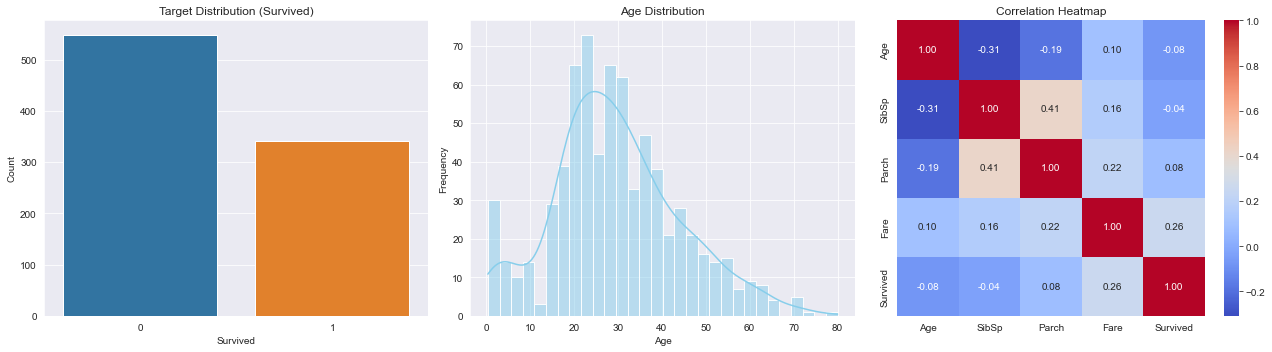

In [3]:
# Set up the figure and subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5), tight_layout=True)

# Plot 1: Target Distribution
sns.countplot(x=target, ax=axes[0])
axes[0].set_title("Target Distribution (Survived)")
axes[0].set_xlabel("Survived")
axes[0].set_ylabel("Count")

# Plot 2: Age Distribution
sns.histplot(titanic_data['Age'].dropna(), bins=30, kde=True, color="skyblue", ax=axes[1])
axes[1].set_title("Age Distribution")
axes[1].set_xlabel("Age")
axes[1].set_ylabel("Frequency")

# Plot 3: Correlation Heatmap
numerical_features = ['Age', 'SibSp', 'Parch', 'Fare']
sns.heatmap(
    titanic_data[numerical_features + [target_column]].corr(),
    annot=True, cmap="coolwarm", fmt=".2f", ax=axes[2]
)
axes[2].set_title("Correlation Heatmap")

# Show the plots
plt.show()

## **1. Initializing the Model**

In [4]:
# Initialize the AutoMLClassifier with default parameters
model = AutoMLClassifier(seed=42)

## 2. Trains the model
Automatically preprocesses data, optimizes models, and selects the best one.

In [5]:
# Train the model
model.fit(X_train, y_train)

Optimizing model: Logistic Regression...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Finished optimization for model: Logistic Regression
Best accuracy: 0.7935
Optimizing model: Decision Tree...
Finished optimization for model: Decision Tree
Best accuracy: 0.8090
Optimizing model: Random Forest...
Finished optimization for model: Random Forest
Best accuracy: 0.8258
Optimizing model: XGBoost...
Finished optimization for model: XGBoost
Best accuracy: 0.8343
Optimizing model: SVM...
Finished optimization for model: SVM
Best accuracy: 0.8230


## 3. Make predictions

Predicts labels for X_test using the best-trained model.

In [6]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# OUTPUTS

When using the **AutoMLClassifier**, several key outputs are available to help you evaluate the performance and behavior of the models. Here's a detailed explanation:

### **1. Scores for All Models**
- **`model.scores`**: Displays the scores of all models tested during the optimization process. This helps you understand how different algorithms performed and compare their relative effectiveness.

In [7]:
model.scores

,Model,Metric,Best Score,Best Params
0,Logistic Regression,accuracy,0.7935,"{'C': 0.1, 'solver': 'saga'}"
1,Decision Tree,accuracy,0.8090,"{'criterion': 'entropy', 'max_depth': 20, 'max..."
2,Random Forest,accuracy,0.8258,"{'bootstrap': False, 'max_depth': 5, 'max_feat..."
3,XGBoost,accuracy,0.8343,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti..."
4,SVM,accuracy,0.8230,"{'C': 1, 'degree': 4, 'kernel': 'rbf'}"


### **2. Best Models for Each Algorithm**
- **`model.best_models`**: Lists the best-performing model for each algorithm that was tested. It provides insight into which algorithm was most suitable for the dataset.


In [8]:
model.best_models

{'Logistic Regression': {'best_model': LogisticRegression(C=0.1, solver='saga'),
  'best_params': OrderedDict([('C', 0.1), ('solver', 'saga')]),
  'best_score': 0.7935},
 'Decision Tree': {'best_model': DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='sqrt',
                         min_samples_leaf=8, min_samples_split=10,
                         random_state=42),
  'best_params': OrderedDict([('criterion', 'entropy'),
               ('max_depth', 20),
               ('max_features', 'sqrt'),
               ('min_samples_leaf', 8),
               ('min_samples_split', 10)]),
  'best_score': 0.809},
 'Random Forest': {'best_model': RandomForestClassifier(bootstrap=False, max_depth=5, max_features='log2',
                         min_samples_leaf=2, min_samples_split=10,
                         random_state=42),
  'best_params': OrderedDict([('bootstrap', False),
               ('max_depth', 5),
               ('max_features', 'log2'),
               ('min_sampl

### **3. Overall Best Model**
- **`model.best_model`**: Identifies the overall best model selected during optimization. This is the model that achieved the highest score based on the chosen evaluation metric.

In [9]:
model.best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

### **4. Best Model's Score**
- **`model.best_score`**: Displays the score of the overall best model. This value reflects the model's performance according to the specified metric (e.g., accuracy).


In [10]:
model.best_score

0.8342558849601103

### **5. Best Model's Parameters**
- **`model.best_params`**: Shows the hyperparameters of the best model. These parameters were optimized during the training process.


In [11]:
model.best_params

OrderedDict([('learning_rate', 0.1),
             ('max_depth', 3),
             ('n_estimators', 50),
             ('subsample', 0.8)])

### **6. Evaluation Score on Test Set**
- **`model.evaluate(X_test, y_test)`**: Evaluates the best model's performance on the test set. This step provides a final check of how well the model generalizes to unseen data.

In [12]:
score = model.evaluate()
score

0.8707865168539326

### **7. Report Generation**
- **`model.generate_report(X_train, y_train)`**: Generates a comprehensive report summarizing the model's performance, including metrics, selected features, and additional insights. This report is useful for documentation and analysis.


Classification Report:
Class 0:
  precision: 0.8492
  recall: 0.9640
  f1-score: 0.9030
  support: 444.0000
Class 1:
  precision: 0.9231
  recall: 0.7164
  f1-score: 0.8067
  support: 268.0000
Class macro avg:
  precision: 0.8861
  recall: 0.8402
  f1-score: 0.8548
  support: 712.0000
Class weighted avg:
  precision: 0.8770
  recall: 0.8708
  f1-score: 0.8667
  support: 712.0000


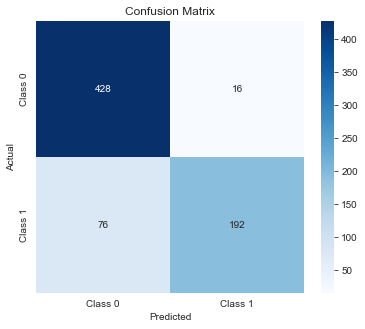

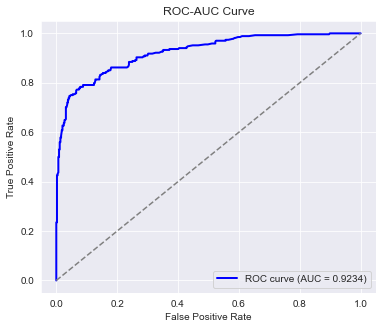

                 Model    Metric  Best Score  \
0  Logistic Regression  accuracy      0.7935   
1        Decision Tree  accuracy      0.8090   
2        Random Forest  accuracy      0.8258   
3              XGBoost  accuracy      0.8343   
4                  SVM  accuracy      0.8230   

                                         Best Params  
0                       {'C': 0.1, 'solver': 'saga'}  
1  {'criterion': 'entropy', 'max_depth': 20, 'max...  
2  {'bootstrap': False, 'max_depth': 5, 'max_feat...  
3  {'learning_rate': 0.1, 'max_depth': 3, 'n_esti...  
4             {'C': 1, 'degree': 4, 'kernel': 'rbf'}  


In [13]:
model.generate_report()

## **Second Example**

 Advanced Workflow Using Custom Parameters

Optimizing model: Logistic Regression...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was

Finished optimization for model: Logistic Regression
Best roc_auc: 0.9851
Optimizing model: Decision Tree...
Finished optimization for model: Decision Tree
Best roc_auc: 0.9711
Optimizing model: Random Forest...
Finished optimization for model: Random Forest
Best roc_auc: 0.9837
Optimizing model: XGBoost...
Finished optimization for model: XGBoost
Best roc_auc: 0.9830
Optimizing model: SVM...
Finished optimization for model: SVM
Best roc_auc: 0.9869
Scores for all models:
                 Model   Metric  Best Score  \
0  Logistic Regression  roc_auc      0.9851   
1        Decision Tree  roc_auc      0.9711   
2        Random Forest  roc_auc      0.9837   
3              XGBoost  roc_auc      0.9830   
4                  SVM  roc_auc      0.9869   

                                         Best Params  
0                  {'C': 100, 'solver': 'liblinear'}  
1  {'criterion': 'log_loss', 'max_depth': 20, 'ma...  
2  {'bootstrap': False, 'max_depth': None, 'max_f...  
3  {'learning_rate':

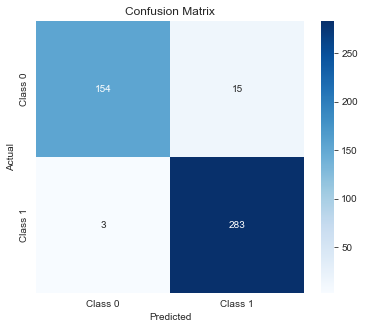

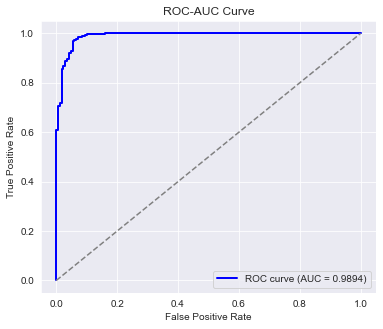

                 Model   Metric  Best Score  \
0  Logistic Regression  roc_auc      0.9851   
1        Decision Tree  roc_auc      0.9711   
2        Random Forest  roc_auc      0.9837   
3              XGBoost  roc_auc      0.9830   
4                  SVM  roc_auc      0.9869   

                                         Best Params  
0                  {'C': 100, 'solver': 'liblinear'}  
1  {'criterion': 'log_loss', 'max_depth': 20, 'ma...  
2  {'bootstrap': False, 'max_depth': None, 'max_f...  
3  {'learning_rate': 0.01, 'max_depth': 5, 'n_est...  
4            {'C': 1, 'degree': 4, 'kernel': 'poly'}  
Report successfully generated.


In [16]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load the Breast Cancer dataset
data = load_breast_cancer()
features = pd.DataFrame(data.data, columns=data.feature_names)
target = pd.Series(data.target, name="target")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize AutoMLClassifier with custom parameters
model = AutoMLClassifier(
    score_metric='roc_auc',
    optimizer='bayes',       # Use Bayesian optimization
    n_iterations=50,         # Increase the number of iterations for better optimization
    cv=3,                    # Use 3-fold cross-validation
    missing_strategy='mean', # Impute missing values with the mean
    normalization_method='minmax',  # Normalize features using MinMaxScaler
    num_features=5,          # Select the top 5 features
    seed=42
)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model and get metrics
print("Scores for all models:")
print(model.scores)

print("\nBest models for each algorithm:")
print(model.best_models)

print("\nOverall best model:")
print(model.best_model)

print("\nBest model's score:")
print(model.best_score)

print("\nBest model's parameters:")
print(model.best_params)

# Evaluate the model on the test set
score = model.evaluate(metric='accuracy')
print("\nEvaluation score on test set:")
print(score)

# Generate a report for the training data
try:
    model.generate_report()
    print("Report successfully generated.")
except TypeError as e:
    print(f"Error while generating report: {e}")